In [1]:
import numpy as np
#サイキットラーン　（メモリの節約のため、sklearnの中からsvmのみをインポートする
from sklearn import svm
# 予測結果の精度表示
from sklearn import metrics
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
import japanize_matplotlib

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


## データ読み込み

In [2]:
# CSVファイル読み込み（訓練データ）
df_train = pd.read_csv('train.csv')
df_train.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [3]:
# 性別を変換する（訓練データ）
gemder=pd.get_dummies(df_train.loc[:,['Gender']])
df_train['Female']=gemder.loc[:,['Gender_Female']]
df_train['Male']=gemder.loc[:,['Gender_Male']]
df_train.drop(columns=['Gender'],inplace=True)
df_train.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Female,Male
0,59,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0,0,1
1,69,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1,0,1
2,65,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0,0,1
3,65,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1,0,1
4,22,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0,1,0


In [5]:
# CSVファイル読み込み（訓練データ）
df_test = pd.read_csv('test.csv')
df_test.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


In [6]:
# 性別を変換する（検証データ）
gemder=pd.get_dummies(df_test.loc[:,['Gender']])
df_test['Female']=gemder.loc[:,['Gender_Female']]
df_test['Male']=gemder.loc[:,['Gender_Male']]
df_test.drop(columns=['Gender'],inplace=True)
df_test.head()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Female,Male
0,25,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006,0,1
1,26,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562,1,0
2,64,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579,0,1
3,65,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070,0,1
4,34,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078,1,0


In [7]:
df_train.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease,Female,Male
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,46.610588,1.607337,0.606737,272.211316,41.978476,61.018120,7.032290,3.517458,1.144570,0.444706,0.174118,0.825882
std,16.453672,2.443585,1.569032,200.348515,145.927366,110.125390,0.840664,0.559942,0.227237,0.497226,0.379434,0.379434
min,10.000000,0.585961,0.034861,163.261838,3.924518,11.283497,4.858679,2.180884,0.627133,0.000000,0.000000,0.000000
25%,32.000000,0.781258,0.144889,213.991414,13.644658,21.239157,6.730612,3.139153,1.004466,0.000000,0.000000,1.000000
50%,48.000000,0.835591,0.194085,220.092503,16.638001,27.056026,6.915580,3.621339,1.205016,0.000000,0.000000,1.000000
75%,62.000000,1.196759,0.335447,229.455927,23.056081,56.461568,7.536151,3.712524,1.287880,1.000000,0.000000,1.000000
max,78.000000,23.017027,17.692164,2108.483728,1423.186473,814.439397,8.739000,5.016970,1.821496,1.000000,1.000000,1.000000


In [8]:
df_test.describe()

,Age,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,Female,Male
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,46.702857,1.631854,0.566151,282.234056,32.363521,61.545428,7.089375,3.561579,1.154658,0.185714,0.814286
std,16.166318,2.857160,1.746409,201.307440,83.888397,114.916494,0.877987,0.607376,0.248094,0.389433,0.389433
min,6.000000,0.610073,0.053853,175.747532,7.862773,11.278741,4.970108,2.296308,0.668751,0.000000,0.000000
25%,32.000000,0.787081,0.147714,214.211425,13.551174,20.842910,6.725417,3.128234,1.008996,0.000000,1.000000
50%,48.000000,0.845039,0.193881,220.738618,16.449139,25.971274,6.931101,3.620933,1.216902,0.000000,1.000000
75%,61.000000,0.973743,0.236440,231.839764,22.760056,52.746083,7.553500,3.738682,1.287962,0.000000,1.000000
max,75.000000,27.050317,17.707907,2101.145760,860.919043,705.777170,8.752045,5.009589,1.805157,1.000000,1.000000


## 訓練

In [7]:
# 説明変数（訓練データ）
x_train = np.array(df_train.loc[:,['Age', 'T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio', 'Female', 'Male']])
# 目的変数（訓練データ）
y_train = np.array(df_train.loc[:,['disease']])
# 説明変数（評価データ）
x_test = np.array(df_test)

In [9]:
# サポートベクターマシーン
clf = svm.SVC()  
# 訓練
clf.fit(x_train, y_train)  

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

## 予測する

In [10]:
y_predict = clf.predict(x_test)       
df_out = pd.DataFrame(y_predict, columns=['val'])
df_out.to_csv('./submit.csv', encoding='utf_8_sig' , header=False)

In [15]:
from collections import Counter
print(Counter(y_predict))

Counter({0: 226, 1: 124})


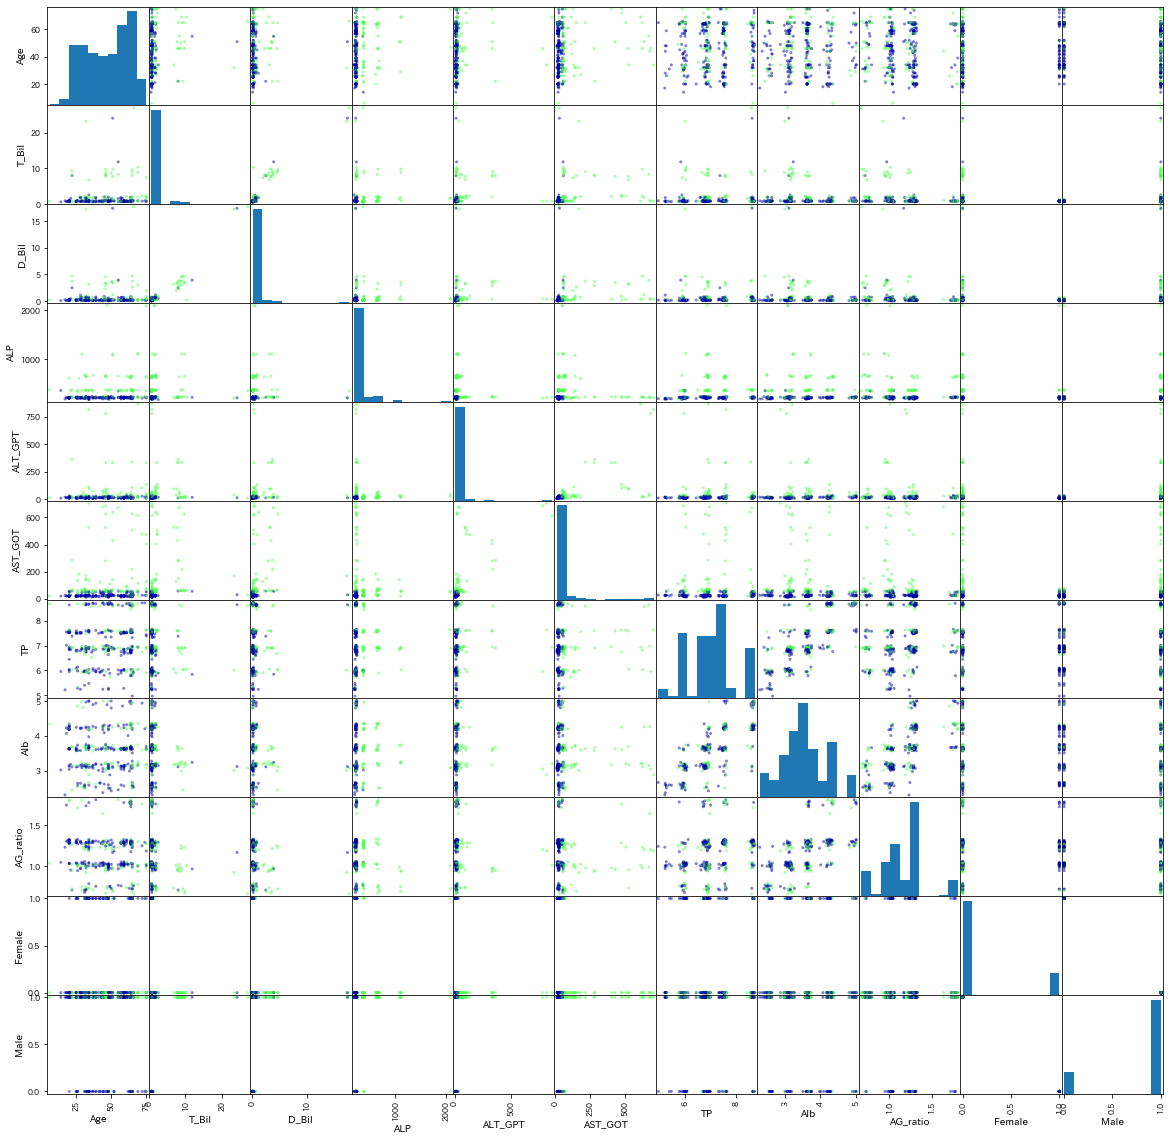

In [16]:
# DataFrameからscatter_matrixを作成
from pandas.plotting import scatter_matrix
import mglearn
grr = scatter_matrix(df_test, c=y_predict,  figsize=(20, 20) , cmap=mglearn.cm3)
plt.show()

## モデルの保存

In [11]:
import pickle
with open('model.pickle', mode='wb') as fp:
    pickle.dump(clf, fp)